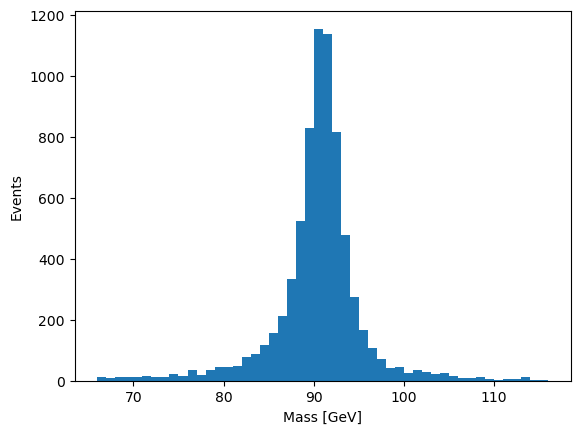

In [7]:
#!/usr/bin/env python
# coding: utf-
import uproot
import vector
import matplotlib.pyplot as plt

# Open the .root file and extract the muon data
tree = uproot.open("delphes_output.root:Delphes")
events = tree.arrays(['Event.Weight','Muon_size','Muon.PT','Muon.Eta','Muon.Phi'])

# create filters to select the events of interest
nmuon_mask = events['Muon_size'] == 2

# create the dimuon system
muons = vector.zip({'pt':events['Muon.PT'],'eta':events['Muon.Eta'],'phi':events['Muon.Phi'],'mass':0.10566})
dimuon = muons[nmuon_mask]

#calculate the dimuon invariant mass and plot it using matplotlib
dimuon_mass = (dimuon[:,0]+dimuon[:,1]).mass
plt.hist(dimuon_mass,bins=50, range=(66,116))
plt.xlabel('Mass [GeV]')
plt.ylabel('Events')
plt.savefig("dimuon_mass.png")
plt.show()
